In [ ]:
import pandas as pd
import os
import tensorflow as tf

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Machine Learning: Supervised/ML_Project')

Mounted at /content/drive


In [ ]:
# Loading the Dataset 
df = pd.read_csv('cleaned.csv')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [ ]:
df.head(5)

,Unnamed: 0,url,label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path,text_tokenized,text_stemmed,text_sent
0,0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0,0,58,58,8,127,135,9,225,215,"['nobell', 'it', 'ffb', 'd', 'dca', 'cce', 'f'...","['nobel', 'it', 'ffb', 'd', 'dca', 'cce', 'f',...",nobel it ffb d dca cce f login skype com en cg...
1,1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0,0,1,1,13,52,65,15,81,65,"['www', 'dghjdgf', 'com', 'paypal', 'co', 'uk'...","['www', 'dghjdgf', 'com', 'paypal', 'co', 'uk'...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0,0,47,47,15,96,111,16,177,160,"['serviciosbys', 'com', 'paypal', 'cgi', 'bin'...","['serviciosbi', 'com', 'paypal', 'cgi', 'bin',...",serviciosbi com paypal cgi bin get into herf s...
3,3,mail.printakid.com/www.online.americanexpress....,0,0,0,0,16,36,52,18,60,41,"['mail', 'printakid', 'com', 'www', 'online', ...","['mail', 'printakid', 'com', 'www', 'onlin', '...",mail printakid com www onlin americanexpress c...
4,4,thewhiskeydregs.com/wp-content/themes/widescre...,0,0,21,21,18,64,82,19,116,96,"['thewhiskeydregs', 'com', 'wp', 'content', 't...","['thewhiskeydreg', 'com', 'wp', 'content', 'th...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
split = round(len(df)*0.8)
train_reviews = df['text_sent'][:split]
train_label = df['label'][:split]
test_reviews = df['text_sent'][split:]
test_label = df['label'][split:]

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf

In [ ]:
import numpy as np
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [ ]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
# transform the dataset
counter = Counter(training_labels_final)
print('before',counter)
smt = SMOTE()
X_train_sm,y_train_sm = smt.fit_resample(padded,training_labels_final)
counter =Counter(y_train_sm)
print('after',counter)
# summarize the new class distribution
# counter = Counter(y)
# print(counter)

before Counter({1: 320862, 0: 84895})
after Counter({0: 320862, 1: 320862})


In [ ]:
num_epochs = 20
history = model.fit(X_train_sm,y_train_sm, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
20054/20054 [==============================] - 232s 12ms/step - loss: 0.2770 - accuracy: 0.8913 - val_loss: 0.3604 - val_accuracy: 0.8562
Epoch 2/20
20054/20054 [==============================] - 230s 11ms/step - loss: 0.1922 - accuracy: 0.9292 - val_loss: 0.3409 - val_accuracy: 0.8603
Epoch 3/20
20054/20054 [==============================] - 207s 10ms/step - loss: 0.1519 - accuracy: 0.9447 - val_loss: 0.3509 - val_accuracy: 0.8537
Epoch 4/20
20054/20054 [==============================] - 216s 11ms/step - loss: 0.1377 - accuracy: 0.9504 - val_loss: 0.3591 - val_accuracy: 0.8529
Epoch 5/20
20054/20054 [==============================] - 223s 11ms/step - loss: 0.1294 - accuracy: 0.9537 - val_loss: 0.3723 - val_accuracy: 0.8504
Epoch 6/20
20054/20054 [==============================] - 231s 12ms/step - loss: 0.1233 - accuracy: 0.9560 - val_loss: 0.3738 - val_accuracy: 0.8504
Epoch 7/20
20054/20054 [==============================] - 225s 11ms/step - loss: 0.1186 - accuracy: 0.9577

<Figure size 432x288 with 0 Axes>

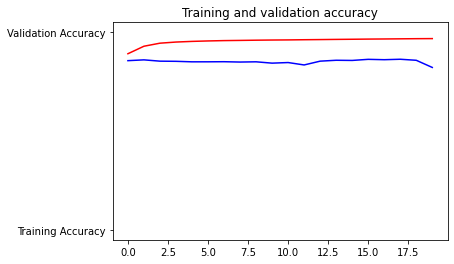

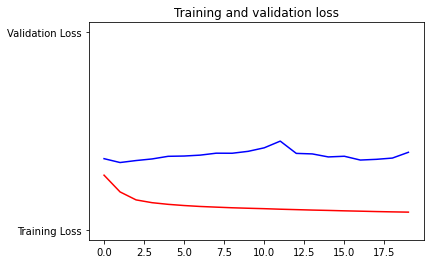

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()